In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from scipy import stats

# Pivot #

In [3]:
nba = Table.read_table('data/nba_salaries.csv')

In [4]:
nba.show(20)

rank,name,position,team,salary,season
1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
3,Alonzo Mourning,C,Miami Heat,15004000,2000
4,Juwan Howard,PF,Washington Wizards,15000000,2000
5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000
6,Karl Malone,PF,Utah Jazz,14000000,2000
7,Larry Johnson,F,New York Knicks,11910000,2000
8,Gary Payton,PG,Seattle SuperSonics,11020000,2000
9,Rasheed Wallace,PF,Portland Trail Blazers,10800000,2000
10,Shawn Kemp,C,Cleveland Cavaliers,10780000,2000


Each player has two categorical attributes, Position and Team (actually three, because their name is also categorical). 

Let's
- Count how many players are in each Position/Team pair
- Two required arguments:
    - First is the column label of the attribute  whose values are the column labels of the pivot table
     - Second is the label for the rows
     
Each cell contains the number of players in that Position/Team category.

Go back to nba and check that there are 3 Centers in the Atlanta Hawks.

In [5]:
nba.pivot('position', 'team')

team,C,F,G,GF,PF,PG,SF,SG,nan
Atlanta Hawks,41,14,30,0,76,37,24,59,0
Bilbao Basket Bilbao Basket,1,0,0,0,0,0,0,0,0
Boston Celtics,46,10,17,0,65,52,30,46,1
Brooklyn Nets,27,12,29,0,19,21,33,30,0
Charlotte Bobcats,46,1,8,0,25,22,31,29,0
Charlotte Hornets,31,3,19,0,23,24,20,30,0
Chicago Bulls,48,22,17,0,62,42,35,58,1
Cleveland Cavaliers,66,12,12,0,41,44,46,62,0
Dallas Mavericks,54,32,28,0,43,52,36,50,2
Denver Nuggets,49,21,24,0,57,40,45,49,0


In [6]:
nba.pivot('team', 'position')

position,Atlanta Hawks,Bilbao Basket Bilbao Basket,Boston Celtics,Brooklyn Nets,Charlotte Bobcats,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Fenerbahce Ulker Fenerbahce Ulker,Golden State Warriors,Houston Rockets,Indiana Pacers,LA Clippers,Los Angeles Clippers,Los Angeles Lakers,Maccabi Haifa Maccabi Haifa,Madrid Real Madrid,Memphis Grizzlies,Miami Heat,Milwaukee Bucks,Minnesota Timberwolves,NO/Oklahoma City Hornets,NO/Oklahoma City Hornets,New Jersey Nets,New Orleans Hornets,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Seattle SuperSonics,Toronto Raptors,Utah Jazz,Vancouver Grizzlies,Washington Wizards,null Unknown
C,41,1,46,27,46,31,48,66,54,49,34,3,61,52,54,48,4,60,0,1,47,50,45,59,0,1,34,18,25,68,47,54,70,58,73,65,69,29,70,69,3,85,0
F,14,0,10,12,1,3,22,12,32,21,18,0,21,22,16,11,2,12,2,0,37,19,15,16,1,1,14,11,12,16,26,10,25,19,19,13,27,6,13,18,2,27,0
G,30,0,17,29,8,19,17,12,28,24,17,0,21,16,23,16,0,25,0,0,26,28,24,11,0,0,8,2,11,18,12,29,15,25,20,20,51,3,34,21,6,30,0
GF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PF,76,0,65,19,25,23,62,41,43,57,71,0,51,64,64,52,4,53,1,0,56,72,78,61,3,4,32,15,20,71,26,55,81,51,60,68,33,16,62,38,6,52,0
PG,37,0,52,21,22,24,42,44,52,40,53,0,47,53,53,57,2,48,0,0,60,28,51,54,2,3,25,15,20,51,49,53,42,56,50,55,43,20,40,53,3,55,0
SF,24,0,30,33,31,20,35,46,36,45,43,0,52,40,49,48,3,69,0,4,60,50,50,53,2,5,27,24,24,53,38,47,34,55,40,59,49,14,56,54,0,52,0
SG,59,0,46,30,29,30,58,62,50,49,47,0,58,51,44,62,2,41,0,2,68,60,49,57,3,1,27,17,26,64,40,49,83,68,63,56,52,18,62,60,0,56,0
nan,0,0,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,1,0,0,0,0,0,0,1,0,0,44


In [7]:
# This one is easier to read

nba.pivot('position', 'team')

team,C,F,G,GF,PF,PG,SF,SG,nan
Atlanta Hawks,41,14,30,0,76,37,24,59,0
Bilbao Basket Bilbao Basket,1,0,0,0,0,0,0,0,0
Boston Celtics,46,10,17,0,65,52,30,46,1
Brooklyn Nets,27,12,29,0,19,21,33,30,0
Charlotte Bobcats,46,1,8,0,25,22,31,29,0
Charlotte Hornets,31,3,19,0,23,24,20,30,0
Chicago Bulls,48,22,17,0,62,42,35,58,1
Cleveland Cavaliers,66,12,12,0,41,44,46,62,0
Dallas Mavericks,54,32,28,0,43,52,36,50,2
Denver Nuggets,49,21,24,0,57,40,45,49,0


Optionally, you can ask pivot to do the following: for each Position/Team combo, find all the **values** of another attribute and **collect** them in some way; display this in the cell.

- The `values` argument has to be the column label of the new attribute
- The `collect` argument has to be the name of a function

In [9]:
# List the number of players in each Position/Team combo

nba.pivot('position', 'team', values='name', collect=len)

team,C,F,G,GF,PF,PG,SF,SG,nan
Atlanta Hawks,41,14,30,0,76,37,24,59,0
Bilbao Basket Bilbao Basket,1,0,0,0,0,0,0,0,0
Boston Celtics,46,10,17,0,65,52,30,46,1
Brooklyn Nets,27,12,29,0,19,21,33,30,0
Charlotte Bobcats,46,1,8,0,25,22,31,29,0
Charlotte Hornets,31,3,19,0,23,24,20,30,0
Chicago Bulls,48,22,17,0,62,42,35,58,1
Cleveland Cavaliers,66,12,12,0,41,44,46,62,0
Dallas Mavericks,54,32,28,0,43,52,36,50,2
Denver Nuggets,49,21,24,0,57,40,45,49,0


In [10]:
# total salary in each Position/Team combo

nba.pivot('position', 'team', values='salary', collect=sum)

team,C,F,G,GF,PF,PG,SF,SG,nan
Atlanta Hawks,167786305,19114456,144716396,0,379273467,146668267,90204142,198582044,0
Bilbao Basket Bilbao Basket,5543116,0,0,0,0,0,0,0,0
Boston Celtics,136738685,44235545,26556547,0,423388103,269988471,287438409,164692464,427163
Brooklyn Nets,157706028,28719216,158331874,0,88437875,138683865,170622958,49438906,0
Charlotte Bobcats,189388764,762195,32332551,0,60065155,45691114,124696887,93995007,0
Charlotte Hornets,212424437,3265000,33271855,0,113266795,100490458,83100164,180976038,0
Chicago Bulls,262283880,116236318,43404078,0,241082449,218527882,142778137,172461892,2232000
Cleveland Cavaliers,358604720,43201357,16726444,0,277027312,194172781,214284006,237873870,0
Dallas Mavericks,234487317,265978833,114687338,0,131441624,172631921,179610388,284300083,12384981
Denver Nuggets,249468229,82463987,68064130,0,472428840,119530666,129684774,156051843,0


In [11]:
# You don't have to type "values = ..." and "collect = "
# But you MUST put the arguments in the correct order

nba.pivot('position', 'team', 'salary', sum)

team,C,F,G,GF,PF,PG,SF,SG,nan
Atlanta Hawks,167786305,19114456,144716396,0,379273467,146668267,90204142,198582044,0
Bilbao Basket Bilbao Basket,5543116,0,0,0,0,0,0,0,0
Boston Celtics,136738685,44235545,26556547,0,423388103,269988471,287438409,164692464,427163
Brooklyn Nets,157706028,28719216,158331874,0,88437875,138683865,170622958,49438906,0
Charlotte Bobcats,189388764,762195,32332551,0,60065155,45691114,124696887,93995007,0
Charlotte Hornets,212424437,3265000,33271855,0,113266795,100490458,83100164,180976038,0
Chicago Bulls,262283880,116236318,43404078,0,241082449,218527882,142778137,172461892,2232000
Cleveland Cavaliers,358604720,43201357,16726444,0,277027312,194172781,214284006,237873870,0
Dallas Mavericks,234487317,265978833,114687338,0,131441624,172631921,179610388,284300083,12384981
Denver Nuggets,249468229,82463987,68064130,0,472428840,119530666,129684774,156051843,0


In [12]:
# Median salary in each Position/Team combo

nba.pivot('position', 'team', 'salary', np.median)

team,C,F,G,GF,PF,PG,SF,SG,nan
Atlanta Hawks,2.95284e+06,1.20314e+06,1.59978e+06,0,3.8144e+06,2.70858e+06,2.35373e+06,1.5e+06,0
Bilbao Basket Bilbao Basket,5.54312e+06,0,0,0,0,0,0,0,0
Boston Celtics,1.96876e+06,2.45754e+06,1.14864e+06,0,3.125e+06,2.17066e+06,5.8307e+06,1.67461e+06,427163
Brooklyn Nets,2.03412e+06,1.07797e+06,1.07472e+06,0,3.22905e+06,1.94242e+06,2.47036e+06,1.43242e+06,0
Charlotte Bobcats,2.92398e+06,762195,3.82436e+06,0,1.944e+06,2.28624e+06,3.61668e+06,1.99e+06,0
Charlotte Hornets,4.03056e+06,1.182e+06,874636,0,3.83184e+06,2.722e+06,2.4e+06,3.13718e+06,0
Chicago Bulls,3.56427e+06,3.52317e+06,1.34938e+06,0,1.81716e+06,3.10376e+06,2.00875e+06,2.1461e+06,2.232e+06
Cleveland Cavaliers,2.44508e+06,2.33865e+06,709054,0,4.06581e+06,3.76886e+06,2.84107e+06,2.225e+06,0
Dallas Mavericks,3.071e+06,5e+06,3.16656e+06,0,854389,1.56028e+06,1.7375e+06,4.01e+06,6.19249e+06
Denver Nuggets,3.3439e+06,2.2e+06,1.50897e+06,0,4.95238e+06,2.10525e+06,1.36992e+06,1.62732e+06,0


In [13]:
# This function returns the distance between the max and the min of a list/array

def data_range(x):
    return max(x) - min(x)

In [14]:
# You can use your own function as the collect
# Distance between the max salary and min salary in each Position/Team combo

nba.pivot('position', 'team', 'salary', data_range)

team,C,F,G,GF,PF,PG,SF,SG,nan
Atlanta Hawks,23132904,2838553,17490573,0,19933629,15229986,24660397,18359600,0
Bilbao Basket Bilbao Basket,0,0,0,0,0,0,0,0,0
Boston Celtics,11243666,10829040,5617308,0,28772475,32545993,32674699,18699008,0
Brooklyn Nets,20889984,8742664,23133419,0,11960131,31637506,38176713,7014961,0
Charlotte Bobcats,13401964,0,2653836,0,7947986,4250959,10403983,13119297,0
Charlotte Hornets,23752590,517000,8971000,0,13926017,19773625,12534000,25021746,0
Chicago Bulls,14041750,14238000,22884000,0,15951146,20035437,27165117,11673238,0
Cleveland Cavaliers,20912055,13779601,6259625,0,28735108,17468723,30536287,14714233,0
Dallas Mavericks,14610002,24952047,11066558,0,27235034,21356016,22831812,19814043,10676203
Denver Nuggets,27478630,12447744,11262506,0,30634611,12062380,12719114,18599782,0


# Hypothesis Testing #

## Sample in Two Categories ##

## Example 1
- Jo: Every single day this bus has chance 70% of being late, regardless of other days.
- Mo: Are you kidding? It's late more often than that!

Let's test:
- **Data:** Watch bus for 200 days, note whether late or not
- **Null:** Every single day this bus has chance 70% of being late, regardless of other days.
- **Alternative:** Chance of "late" is more than 70%

Test statistic: All of the following are fine:
- percent late - 70
- number of days late - 140
- number of days late
- percent of days late
- proportion of days late

(For the P-value) Direction that supports alternative: For each of these statistics, positive values or large values support the alternative. So look right.

In [15]:
# The simulation will be under the null hypothesis.

null_proportions = make_array(0.7, 0.3)

In [16]:
# Suppose we choose |proportion late - .7| as the test statistic.
# Define a function that simulates ONE value of this statistic under the null

# This code depends on the null hypothesis and the choice of statistic.

def distance_under_null():
    proportion_late = sample_proportions(200, null_proportions).item(0)
    return abs(proportion_late - 0.7)

# Note: If you want to use counts instead of proportions, multiply by sample size
# If you want to use percents instead of proportions, multiply by 100

In [17]:
# Simulate 10,000 values of the test statistic
# and collect them in an array.
# This code always looks the same.

distances = make_array()
for i in np.arange(10000):
    distances = np.append(distances, distance_under_null())

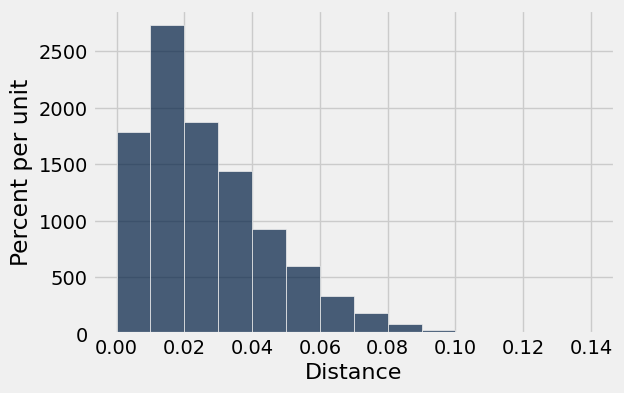

In [18]:
# If the null is true, this is how the statistic should behave

distance_tbl = Table().with_column('Distance', distances)
distance_tbl.hist(bins=np.arange(0, 0.14, 0.01))

In [19]:
# Until now, we haven't needed to use what was actually observed.
# But at this point we have to compare the null prediction with the observed statistic.

# Suppose the data are 150 times late out of 200 times

observed_statistic = abs(150/200 - .7)
observed_statistic

0.050000000000000044

In [20]:
empirical_p = np.count_nonzero(distances >= observed_statistic) / 10000
empirical_p

0.1253

Interpreting the P-value:
It is the chance, assuming that the bus is late 70% of the time, that we get a statistic that is 0.05 or greater.

That chance is 12.4%, which is substantial. So if the null is true there is a decent chance of getting the statistic that was actually observed or one that looks even more like the alternative. So the data are consistent with the null.

## Sample in Multiple Categories ##

- Jo: Every single day this bus has a 50% chance of being a bit late, a 20% chance of being very late, and a 30% chance of being on time, regardless of other days.
- Po: No it doesn't.

Let's test:
- **Data:** Watch bus for 200 days, note arrivals in the three categories
- **Null:** Every single day this bus has a 50% chance of being a bit late, a 20% chance of being very late, and a 30% chance of being on time, regardless of other days.
- **Alternative:** The null model is wrong.

Test statistic: TVD. 
It has to be a distance (because "wrong"), and it has to measure the distance between two categorical distributions, not two numbers.

(For the P-value) Direction that supports alternative: Big distances support the alternative. Look right.

In [22]:
null_proportions = make_array(0.5, 0.2, 0.3)

def tvd_under_null():
    in_sample = sample_proportions(200, null_proportions)
    return sum(abs(in_sample - null_proportions))/2

In [23]:
tvds = make_array()
for i in np.arange(10000):
    tvds = np.append(tvds, tvd_under_null())

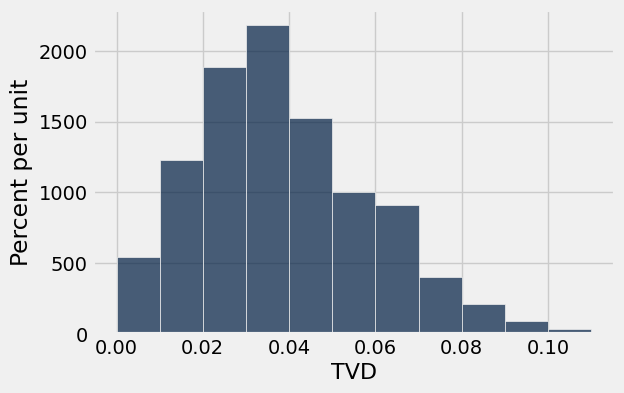

In [24]:
tvd_tbl = Table().with_column('TVD', tvds)
tvd_tbl.hist(bins=np.arange(0, .12, 0.01))

In [25]:
# This above is the prediction made by the null hypothesis.
# Compare with the data:
# Suppose the data are 90 times a bit late, 60 times very late, 50 times on time

observed_proportions = make_array(90, 60, 50)/200
observed_tvd = sum(abs(observed_proportions - null_proportions))/2
observed_tvd

0.099999999999999978

In [26]:
empirical_p = np.count_nonzero(tvds >= observed_tvd)/10000
empirical_p

0.0063

Conclusion of test: The data support the hypothesis that the null model is wrong.

Notice that when we had a more crude model ("late 70% of the time") compared to this one ("a bit late 50% of the time, very late 20% of the time, on time 30%), the percent late was 70% in both cases. The observed data were also consistent with each other: 150 late out of 200, compared to 90 "a bit late", 60 "very late", and 50 "on time". The latter is still 150 late.

The tests said the data are consistent with 70% late, but not with 50% a bit late, 20% very late, and 30% on time. That's not surprising. Often, the more detailed specifications you have in your model, the less likely you are to see all of that in the data even if the model is good.